In [1]:
import pandas as pd
import numpy as np
import os

headers = ['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume(BTC)', 'Volume(Currency)', 'WeightedPrice']
data = pd.DataFrame(columns=headers)

for filename in os.listdir('../datasets/bitcoin-1'):
    data = pd.concat([data, pd.read_csv(f'../datasets/bitcoin-1/{filename}', index_col=False)])
    print(filename)
    
data['Change'] = data['Open'] - data['Close']
data['PerChange'] = (data['Open'] - data['Close'])/data['WeightedPrice']

2020-07-20.csv
2020-07-21.csv
2020-07-22.csv
2020-07-23.csv
2020-07-24.csv
2020-07-25.csv
2020-07-26.csv
2020-07-27.csv
2020-07-28.csv
2020-07-29.csv


In [2]:
def split_sequence(seq, n_steps_in, n_steps_out):
    """
    Splits the univariate time sequence
    """
    X, y = [], []
    
    for i in range(len(seq)):
        end = i + n_steps_in
        out_end = end + n_steps_out
        
        if out_end > len(seq):
            break
        
        seq_x, seq_y = seq[i:end], seq[end:out_end]
        
        X.append(seq_x)
        y.append(seq_y)
    
    return np.array(X), np.array(y)

In [3]:
from sklearn.preprocessing import StandardScaler

changes = StandardScaler().fit_transform(pd.DataFrame(data['PerChange']))
d = split_sequence(changes, 10, 1)

X = d[0].reshape(-1, 10)
y = d[1].reshape(-1, 1)

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.layers import Bidirectional

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(10,)))
model.add(Dense(150, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

In [36]:
model.compile(loss='mean_absolute_error',
              optimizer='adam',
              metrics=['mean_absolute_error'])

In [37]:
history = model.fit(X_train, y_train,
               epochs=60,
                validation_data=(X_test, y_test)
        )

Epoch 1/60
360/360 [==============================] - 0s 1ms/step - loss: 0.3721 - mean_absolute_error: 0.3721 - val_loss: 0.3523 - val_mean_absolute_error: 0.3523
Epoch 2/60
360/360 [==============================] - 0s 747us/step - loss: 0.3654 - mean_absolute_error: 0.3654 - val_loss: 0.3503 - val_mean_absolute_error: 0.3503
Epoch 3/60
360/360 [==============================] - 0s 719us/step - loss: 0.3626 - mean_absolute_error: 0.3626 - val_loss: 0.3493 - val_mean_absolute_error: 0.3493
Epoch 4/60
360/360 [==============================] - 0s 708us/step - loss: 0.3613 - mean_absolute_error: 0.3613 - val_loss: 0.3499 - val_mean_absolute_error: 0.3499
Epoch 5/60
360/360 [==============================] - 0s 700us/step - loss: 0.3602 - mean_absolute_error: 0.3602 - val_loss: 0.3500 - val_mean_absolute_error: 0.3500
Epoch 6/60
360/360 [==============================] - 0s 719us/step - loss: 0.3582 - mean_absolute_error: 0.3582 - val_loss: 0.3541 - val_mean_absolute_error: 0.3541
Epoch 

360/360 [==============================] - 0s 706us/step - loss: 0.2741 - mean_absolute_error: 0.2741 - val_loss: 0.3767 - val_mean_absolute_error: 0.3767
Epoch 51/60
360/360 [==============================] - 0s 703us/step - loss: 0.2727 - mean_absolute_error: 0.2727 - val_loss: 0.3850 - val_mean_absolute_error: 0.3850
Epoch 52/60
360/360 [==============================] - 0s 720us/step - loss: 0.2725 - mean_absolute_error: 0.2725 - val_loss: 0.3790 - val_mean_absolute_error: 0.3790
Epoch 53/60
360/360 [==============================] - 0s 719us/step - loss: 0.2697 - mean_absolute_error: 0.2697 - val_loss: 0.3796 - val_mean_absolute_error: 0.3796
Epoch 54/60
360/360 [==============================] - 0s 703us/step - loss: 0.2680 - mean_absolute_error: 0.2680 - val_loss: 0.3815 - val_mean_absolute_error: 0.3815
Epoch 55/60
360/360 [==============================] - 0s 714us/step - loss: 0.2673 - mean_absolute_error: 0.2673 - val_loss: 0.3767 - val_mean_absolute_error: 0.3767
Epoch 56/6

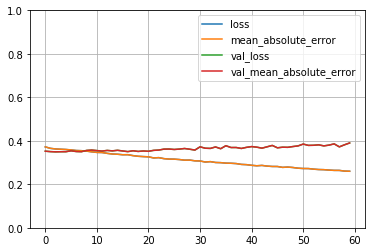

In [38]:
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [42]:
import seaborn as sns

sns.lineplot(x=range(len(X)), y=X.reshape(-1), data=data)

ValueError: arrays must all be same length